In [ ]:
using Pkg
Pkg.activate("../.."); # Actives the environment at the root of the project

# Using our Carbon-I and vSmartMOM packages (developed by our team)
using CairoMakie, DelimitedFiles, Statistics, Interpolations
using Unitful, UnitfulEquivalences, CarbonI

# Include custom plot settings and colors
include(joinpath("../../src/Plots", "CI_colorsNew.jl"));
set_theme!(theme_ggplot2())

# Define constants
from_w_to_photons = 5.03e12
refRadiance = 1.0e16 # in photons/s/m²/nm

# Load stressing scenario (tropical forest)
scenario = CarbonI.stressing_scenario()

# Read data from files
l1_3_fpa_cbe = readdlm("../../data/L1s/Level1-3-BaselineScenario_FPA_CBE.csv");
l1_4_fpa_cbe = readdlm("../../data/L1s/Level1-4-BaselineScenario_FPA_CBE.csv");
l1_3_fpa_req = readdlm("../../data/L1s/Level1-3-BaselineScenario_FPA_Req.csv");
l1_4_fpa_req = readdlm("../../data/L1s/Level1-4-BaselineScenario_FPA_Req.csv");

cbe_instrument_wl = l1_3_fpa_cbe[:, 1];
req_instrument_wl = l1_3_fpa_req[:, 1];
e_cbe_3 = l1_3_fpa_cbe[:, 2];
e_cbe_4 = l1_4_fpa_cbe[:, 2];
e_req_3 = l1_3_fpa_req[:, 2];
e_req_4 = l1_4_fpa_req[:, 2];

l1_3_data = readdlm("../../data/L1s/L1-3_lines.dat");
l1_4_data = readdlm("../../data/L1s/L1-4_lines.dat");
TotalEfficiencies = l1_3_data[:, 1];

req_error_3 = readdlm("../../data/L1s/L1-3_req_error.dat")[1];
req_error_4 = readdlm("../../data/L1s/L1-4_req_error.dat")[1];

  Activating project at `~/code/gitHub/CarbonI`
┌ Info: CUDA-enabled GPU(s) detected
└ @ vSmartMOM /home/cfranken/code/gitHub/vSmartMOM.jl/src/vSmartMOM.jl:57
┌ Info: CUDA.CuDevice(0): NVIDIA A100-PCIE-40GB
└ @ vSmartMOM /home/cfranken/code/gitHub/vSmartMOM.jl/src/vSmartMOM.jl:59
┌ Info: CUDA.CuDevice(1): NVIDIA A100-PCIE-40GB
└ @ vSmartMOM /home/cfranken/code/gitHub/vSmartMOM.jl/src/vSmartMOM.jl:59


In [2]:
CarbonI_colors

In [17]:
# Load stressing scenario (tropical forest)
scenario = CarbonI.stressing_scenario()

(ds["T"])[iLon, iLat, :, timeIndex] = Union{Missing, Float32}[205.17984, 205.28577, 204.3511, 205.65045, 211.39908, 219.25983, 225.50705, 229.22559, 234.98184, 241.08362, 247.89389, 254.52339, 259.31662, 260.55365, 261.2295, 260.91293, 257.9075, 254.52269, 250.68933, 247.50629, 245.75996, 242.73718, 241.07652, 237.61713, 235.17921, 236.70642, 230.41078, 229.94821, 222.20546, 218.0587, 214.88086, 212.21912, 209.32239, 206.50714, 197.59671, 192.69617, 194.36191, 199.31332, 201.06302, 203.26447, 209.37901, 217.33842, 226.74182, 236.74905, 245.94034, 253.06683, 256.719, 261.30786, 265.14124, 268.4499, 271.63074, 274.55365, 276.77612, 279.03894, 281.011, 282.8612, 284.70425, 286.3738, 287.6122, 288.7355, 289.78403, 290.64203, 290.84982, 291.21863, 292.01584, 293.05814, 294.24646, 295.5233, 296.82358, 298.12357, 299.40927, 300.6187]


CarbonI.Scenario(0.0, -62.0, 35.0, CarbonI.AtmosphericProfile{Float64}(0.0, -62.0, 100670.765625, [205.17984008789062, 205.2857666015625, 204.35110473632812, 205.65045166015625, 211.39907836914062, 219.25982666015625, 225.50704956054688, 229.2255859375, 234.98184204101562, 241.0836181640625  …  290.8498229980469, 291.2186279296875, 292.0158386230469, 293.0581359863281, 294.2464599609375, 295.5232849121094, 296.8235778808594, 298.1235656738281, 299.4092712402344, 300.61871337890625], [2.39347355091013e-6, 2.7316932573739905e-6, 3.312939497845946e-6, 3.7735085243184585e-6, 4.108104349143105e-6, 4.208959580864757e-6, 4.293275651434669e-6, 4.340312443673611e-6, 4.345240995462518e-6, 4.363792868389282e-6  …  0.01229883637279272, 0.013518167659640312, 0.014540438540279865, 0.015146967954933643, 0.015558918938040733, 0.015884818509221077, 0.016149116680026054, 0.016402551904320717, 0.016726722940802574, 0.01744966022670269], [0.4500000596046448, 1.5350002884864806, 2.9142507553100585, 4.57925

In [4]:
# Read data from other notebooks
l1_3_fpa_cbe = readdlm("../../data/L1s/Level1-3-BaselineScenario_FPA_CBE.csv");
l1_4_fpa_cbe = readdlm("../../data/L1s/Level1-4-BaselineScenario_FPA_CBE.csv");
l1_3_fpa_req = readdlm("../../data/L1s/Level1-3-BaselineScenario_FPA_Req.csv");
l1_4_fpa_req = readdlm("../../data/L1s/Level1-4-BaselineScenario_FPA_Req.csv");

cbe_instrument_wl = l1_3_fpa_cbe[:, 1];
req_instrument_wl = l1_3_fpa_req[:, 1];
e_cbe_3 = l1_3_fpa_cbe[:, 2];
e_cbe_4 = l1_4_fpa_cbe[:, 2];
e_req_3 = l1_3_fpa_req[:, 2];
e_req_4 = l1_4_fpa_req[:, 2];


# Read data from other notebooks
l1_3_data = readdlm("../../data/L1s/L1-3_lines.dat");
l1_4_data = readdlm("../../data/L1s/L1-4_lines.dat");
TotalEfficiencies = l1_3_data[:, 1];

req_error_3 = readdlm("../../data/L1s/L1-3_req_error.dat")[1];
req_error_4 = readdlm("../../data/L1s/L1-4_req_error.dat")[1];
@show req_error_3

req_error_3 = 4.430941034496331


4.430941034496331

In [5]:
@show e_cbe_3
@show e_req_3

e_cbe_3 = [16476.007259402424, 16484.317655293547, 15635.687720894803, 13545.256230214909, 13032.530266883381, 11523.650154642995, 8408.507916965726, 10243.89438687162, 13981.756021068215, 14380.614209922003, 12332.079612804353, 9992.033797148946, 9979.718774674397, 12483.97334744897, 14785.899329681186, 15137.12908130705, 14185.537517073228, 12821.236319871694, 11550.991028404884, 10455.933785135578, 8574.042854973055, 7700.507169866986, 7911.651640374076, 7647.445539257355, 6963.000677253256, 5808.363032466977, 5731.419880651624, 6691.884304465896, 6995.326146292771, 6128.188305547699, 5824.556125495697, 6915.571318247365, 8105.561278821798, 9845.212630444115, 11178.576832516677, 10073.117304377573, 9318.45408863633, 8907.008573350093, 7322.011549926748, 7578.75834515204, 8709.744879821696, 8814.103132501064, 8099.037877433258, 7392.10404956876, 8395.38473031047, 9455.505812722877, 8924.469612972392, 8458.722491361177, 7798.9474193723945, 7367.247033747848, 8646.931399944768, 9982.05

469-element Vector{Float64}:
  8021.05583710703
  8179.021991488806
  9002.082850558823
  9533.401055504966
  9227.129845984991
  8558.616997317418
  8381.298402173648
  9006.622179400167
  9953.298997690128
 10510.285154575828
     ⋮
  5491.61798715049
  4913.802591536781
  4348.376338516673
  4283.6483807237255
  4814.212957593185
  5308.219400942921
  5130.407780677152
  4367.699338945369
  3563.5705909539693

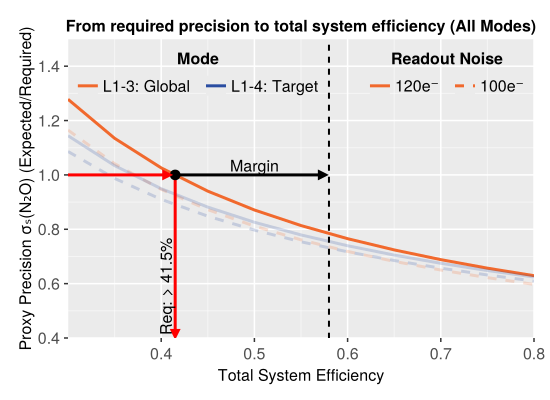

In [54]:
f = Figure(resolution=(550,400))
ax = Axis(f[1,1], xlabel="Total System Efficiency",yticks=0:0.2:4, ylabel="Proxy Precision σₛ(N₂O) (Expected/Required)",  title="From required precision to total system efficiency (All Modes)")
# For CH4 (100 and 120e-)
al = 0.2
n2o_120_3 = lines!(ax, TotalEfficiencies, l1_3_data[:,3]/req_error_3, color=CarbonI_colors[5], linewidth=3, label="CH₄ (120e⁻)")
n2o_100_3 = lines!(ax, TotalEfficiencies, l1_3_data[:,2]/req_error_3, color=CarbonI_colors[5], linewidth=3, linestyle=:dash, label="CH₄ (100e⁻)", alpha=al)

# For CO2 (100 and 120e-)
n2o_120_4 = lines!(ax, TotalEfficiencies, l1_4_data[:,3]/req_error_4, color=CarbonI_colors[4], linewidth=3, label="CO₂ (120e⁻)", alpha=al)
n2o_100_4 = lines!(ax, TotalEfficiencies, l1_4_data[:,2]/req_error_4, color=CarbonI_colors[4], linewidth=3, linestyle=:dash, label="CO₂ (100e⁻)", alpha=al)


#lines!(ax, TotalEfficiencies, ones(length(TotalEfficiencies)), color=:black, linewidth=2, label="Requirement")

req_eff = 0.4150
req_error = 1.0
eff_cbe = 0.58
arrows!(ax, [req_eff,],[req_error,],[0,],[-req_error+0.42,],arrowsize = 15, linewidth=3,color = color = :red)
text!(ax, "Req: > $(round(100req_eff,sigdigits = 3))%", position = (req_eff, 0.59),
    align = (:center, :bottom), color = :black, rotation=π/2)


# Indicate Margins
arrows!(ax, [req_eff+0.002,],[req_error,],[eff_cbe-req_eff-0.01,],[0,],arrowsize = 15, linewidth=3, color = :black)
text!(ax, "Margin", position = (0.5, req_error),  align = (:center, :bottom), color = :black)
DR = scatter!(ax, [req_eff], [req_error], color=:black, markersize=15, label="Driving Req.")
arrows!(ax, [0.0,],[1,],[req_eff-0.01,],[0,],arrowsize = 15, linewidth=3, color = :red)
# Show CBE Total Efficiency
CBE = lines!(ax, [eff_cbe,eff_cbe], [0,1.5], color=:black, linestyle=:dash, linewidth=2, label="CBE")
axislegend(ax, [n2o_120_3, n2o_120_4], ["L1-3: Global", "L1-4: Target"], "Mode", position = :lt,
    orientation = :horizontal)
axislegend(ax, [n2o_120_3, n2o_100_3], ["120e⁻", "100e⁻"], "Readout Noise", position = :rt,
    orientation = :horizontal)

xlims!(ax,0.3,0.8)
ylims!(ax,0.4,1.5)
#axislegend(ax,position = :rt)
save("../../plots/final/FO-E2-Level1-3_4-EfficiencyDerivation_perMode.pdf",f)
save("../../plots/final/FO-E2-Level1-3_4-EfficiencyDerivation_perMode.eps",f)
f

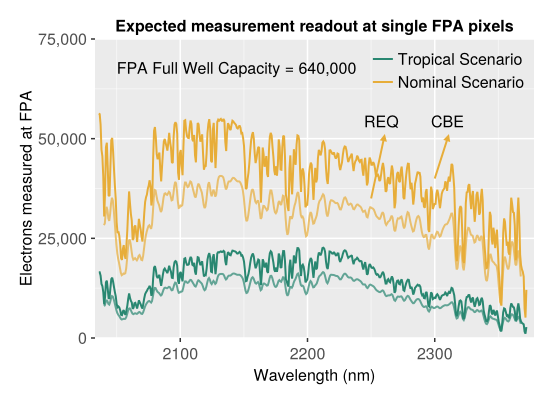

In [7]:
from_w_to_photons = 5.03e12
refRadiance = 1.0e16 # in photons/s/m²/nm

f = Figure(resolution=(550,400), backgroundcolor=:transparent)
ax = Axis(f[1,1], xlabel="Wavelength (nm)", ylabel="Electrons measured at FPA", yticks=(0:25:75, ["0","25,000", "50,000","75,000"]), title="Expected measurement readout at single FPA pixels")
#Label(f[1, 1, Top()], halign = :left, "x1000")
lines!(ax, cbe_instrument_wl,e_cbe_3/1000, color=CarbonI_colors[3], linewidth=2, label="Tropical Scenario")
lines!(ax, cbe_instrument_wl,e_cbe_4/1000, color=CarbonI_colors[1], linewidth=2, label="Nominal Scenario")
lines!(ax, req_instrument_wl,e_req_3/1000, color=CarbonI_colors[3], linewidth=2, alpha=0.7)
lines!(ax, req_instrument_wl,e_req_4/1000, color=CarbonI_colors[1], linewidth=2, alpha=0.7)
text!(ax, "FPA Full Well Capacity = 640,000", position=(2050.0,65.4),align = (:left, :bottom), color = :black)
arrows!(ax, [2300.0,],[40,],[10,],[10,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1])
arrows!(ax, [2250.0,],[35,],[10,],[15,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1], alpha=0.7)
text!(ax, "CBE", position=(2310.0,52),align = (:center, :bottom), color = :black)
text!(ax, "REQ", position=(2258.0,52),align = (:center, :bottom), color = :black)

#lines!(ax, [2035,2375], [refRadiance/ 1e16,refRadiance/ 1e16], color=:black, linestyle=:dash, linewidth=1, label="Reference Tropical Radiance")
xlims!(ax, 2033, 2378)
ylims!(ax, 0, 75)
axislegend(ax,position = :rt)
save("../../plots/final/Level1-3-4-Readout_FPA.pdf",f)
f

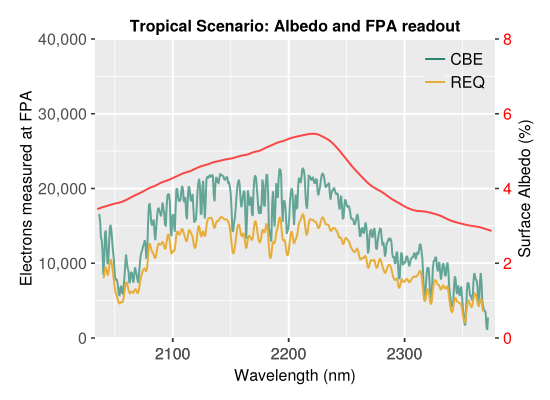

In [46]:
from_w_to_photons = 5.03e12
refRadiance = 1.0e16 # in photons/s/m²/nm
wl = 2035:1:2375
f = Figure(resolution=(550,400), backgroundcolor=:transparent)
ax = Axis(f[1,1], xlabel="Wavelength (nm)", ylabel="Electrons measured at FPA", yticks=(0:10:60, ["0","10,000", "20,000","30,000",  "40,000","50,000", "60,000"]), title="Tropical Scenario: Albedo and FPA readout")
ax2 = Axis(f[1, 1], yticklabelcolor = :red, yaxisposition = :right, ylabel="Surface Albedo (%)")
#Label(f[1, 1, Top()], halign = :left, "x1000")
lines!(ax, cbe_instrument_wl,e_cbe_3/1000, color=CarbonI_colors[3], linewidth=2, alpha=0.7, label="CBE")
#lines!(ax, cbe_instrument_wl,e_cbe_4/1000, color=CarbonI_colors[1], linewidth=2, label="Nominal Scenario")
lines!(ax, req_instrument_wl,e_req_3/1000, color=CarbonI_colors[1], linewidth=2, label="REQ")
lines!(ax2, wl,100scenario.surface_albedo.(wl), color=:red, linewidth=2, alpha=0.7)
#lines!(ax, req_instrument_wl,e_req_4/1000, color=CarbonI_colors[1], linewidth=2, alpha=0.7)
text!(ax, "FPA Full Well Capacity = 640,000", position=(2050.0,65.4),align = (:left, :bottom), color = :black)
#arrows!(ax, [2300.0,],[40,],[10,],[10,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1])
#arrows!(ax, [2250.0,],[35,],[10,],[15,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1], alpha=0.7)
#text!(ax, "CBE", position=(2310.0,52),align = (:center, :bottom), color = :black)
#text!(ax, "REQ", position=(2258.0,52),align = (:center, :bottom), color = :black)

#lines!(ax, [2035,2375], [refRadiance/ 1e16,refRadiance/ 1e16], color=:black, linestyle=:dash, linewidth=1, label="Reference Tropical Radiance")
xlims!(ax, 2033, 2378)
xlims!(ax2, 2033, 2378)
ylims!(ax, 0, 40)
ylims!(ax2, 0,8 )
axislegend(ax,position = :rt)
save("../../plots/final/FO-E2-Level1-4-Readout_FPA_Albedo.pdf",f)
f

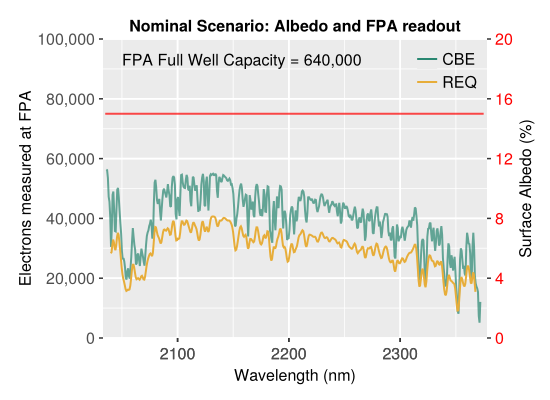

In [48]:
from_w_to_photons = 5.03e12
refRadiance = 1.0e16 # in photons/s/m²/nm
wl = 2035:1:2375
f = Figure(resolution=(550,400), backgroundcolor=:transparent)
ax = Axis(f[1,1], xlabel="Wavelength (nm)", ylabel="Electrons measured at FPA", yticks=(0:20:120, ["0","20,000", "40,000","60,000",  "80,000","100,000", "120,000"]), title="Nominal Scenario: Albedo and FPA readout")
ax2 = Axis(f[1, 1], yticklabelcolor = :red, yaxisposition = :right, yticks=0:4:20,ylabel="Surface Albedo (%)")
#Label(f[1, 1, Top()], halign = :left, "x1000")
lines!(ax, cbe_instrument_wl,e_cbe_4/1000, color=CarbonI_colors[3], linewidth=2, alpha=0.7, label="CBE")
#lines!(ax, cbe_instrument_wl,e_cbe_4/1000, color=CarbonI_colors[1], linewidth=2, label="Nominal Scenario")
lines!(ax, req_instrument_wl,e_req_4/1000, color=CarbonI_colors[1], linewidth=2, label="REQ")
lines!(ax2, wl,ones(length(wl))*15, color=:red, linewidth=2, alpha=0.7)
#lines!(ax, req_instrument_wl,e_req_4/1000, color=CarbonI_colors[1], linewidth=2, alpha=0.7)
text!(ax, "FPA Full Well Capacity = 640,000", position=(2050.0,90),align = (:left, :bottom), color = :black)
#arrows!(ax, [2300.0,],[40,],[10,],[10,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1])
#arrows!(ax, [2250.0,],[35,],[10,],[15,],arrowsize = 10, linewidth=2,color = CarbonI_colors[1], alpha=0.7)
#text!(ax, "CBE", position=(2310.0,52),align = (:center, :bottom), color = :black)
#text!(ax, "REQ", position=(2258.0,52),align = (:center, :bottom), color = :black)

#lines!(ax, [2035,2375], [refRadiance/ 1e16,refRadiance/ 1e16], color=:black, linestyle=:dash, linewidth=1, label="Reference Tropical Radiance")
xlims!(ax, 2033, 2378)
xlims!(ax2, 2033, 2378)
ylims!(ax, 0, 100)
ylims!(ax2, 0,20 )
axislegend(ax,position = :rt)
save("../../plots/final/FO-E2-Level1-3-Readout_FPA_Albedo.pdf",f)
f

In [8]:
req_instrument_wl

469-element Vector{Float64}:
 2040.0
 2040.7
 2041.4
 2042.1
 2042.8
 2043.5
 2044.2
 2044.9
 2045.6
 2046.3
    ⋮
 2362.0
 2362.7
 2363.4
 2364.1
 2364.8
 2365.5
 2366.2
 2366.9
 2367.6